# <a>Project 3 - Classification Using Scikit Learn</a>

## Let's Data - Data Science Journey

*By Reginaldo Jr - <a>reginaldojr@yahoo.com</a>*

### Imports and Configurations

In [1]:
import pandas as pd
import warnings
import seaborn as sns
import numpy as np
import xgboost as xgb

from IPython.display import clear_output
from matplotlib import pyplot as plt
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, RobustScaler
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import (
    LogisticRegression, 
    PassiveAggressiveClassifier, 
    SGDClassifier, 
    RidgeClassifier    
)

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier, 
    AdaBoostClassifier, 
    ExtraTreesClassifier, 
    BaggingClassifier
)
from xgboost import XGBClassifier

sns.set_style("darkgrid")

warnings.filterwarnings("ignore")

pd.set_option("display.float_format", None)
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

### Data

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [3]:
df.shape

(5634, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5634 non-null   int64  
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5416 non-null   object 
 5   tenure            5173 non-null   float64
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [5]:
len(df["id"].unique())

5634

In [6]:
df = df.set_index("id")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [7]:
df.shape

(5634, 20)

In [8]:
df["TotalCharges"].value_counts()

TotalCharges
20.2       8
           8
19.55      7
19.75      6
19.9       6
19.45      6
19.65      6
20.05      6
20.25      6
45.3       5
20.15      5
44.4       4
69.6       4
20.3       4
50.15      4
19.3       4
44         4
20.45      4
19.2       4
69.65      4
45.7       3
1284.2     3
20.4       3
70.1       3
49.9       3
19.85      3
470.2      3
74.35      3
20.1       3
50.45      3
35.9       3
24.4       3
50.75      3
69.55      3
74.6       3
19.95      3
220.45     3
69.9       3
20.35      3
85.5       3
70.45      3
74.7       3
69.95      3
80.55      3
75.3       3
69.1       3
70.6       3
69.25      3
45.1       3
19.5       3
383.65     3
44.75      3
25.25      3
70.3       3
1077.5     2
71.65      2
79.15      2
5714.2     2
96.8       2
20.95      2
235.05     2
4858.7     2
2104.55    2
75.35      2
2661.1     2
330.8      2
92.75      2
20.5       2
2560.1     2
469.65     2
223.15     2
300.4      2
398.55     2
86.6       2
70         2
42.9       2

In [9]:
df["TotalCharges"].dtype

dtype('O')

In [10]:
[id for id in df.index if str(df.loc[id,"TotalCharges"]).strip()==""]

[6755, 5219, 6671, 937, 3827, 1083, 3332, 1341]

In [11]:
for i in [id for id in df.index if str(df.loc[id,"TotalCharges"]).strip()==""]:
    df.loc[i,"TotalCharges"]=np.nan

In [12]:
df["TotalCharges"]=df["TotalCharges"].astype(float)
df["TotalCharges"].dtype

dtype('float64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 4030 to 103
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5416 non-null   object 
 4   tenure            5173 non-null   float64
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5535 non-null   object 
 17

### EDA

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5634.000000,5173.000000,5634.000000,5626.000000,5634.000000
mean,0.158679,32.332882,64.626438,2273.513811,0.265353
std,0.365409,24.463607,30.021806,2258.383946,0.441560
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.462500,401.587500,0.000000
50%,0.000000,29.000000,70.250000,1396.125000,0.000000
75%,0.000000,55.000000,89.800000,3764.287500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [15]:
df.describe([x/10 for x in range(10)])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5634.000000,5173.000000,5634.000000,5626.000000,5634.000000
mean,0.158679,32.332882,64.626438,2273.513811,0.265353
std,0.365409,24.463607,30.021806,2258.383946,0.441560
min,0.000000,0.000000,18.250000,18.800000,0.000000
0%,0.000000,0.000000,18.250000,18.800000,0.000000
10%,0.000000,2.000000,20.050000,85.500000,0.000000
20%,0.000000,6.000000,25.100000,267.000000,0.000000
30%,0.000000,12.000000,45.800000,550.975000,0.000000
40%,0.000000,20.000000,58.600000,939.800000,0.000000
50%,0.000000,29.000000,70.250000,1396.125000,0.000000


In [16]:
df["Churn"].value_counts()

Churn
0    4139
1    1495
Name: count, dtype: int64

In [17]:
df["Churn"].value_counts()[0]/df.shape[0] * 100

73.46467873624422

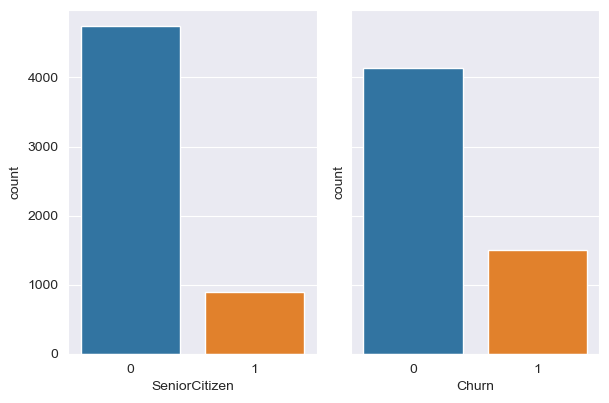

In [18]:
fig, graf = plt.subplots(1,2, figsize=(6,4), sharey=True)
plt.tight_layout()
for i,col in enumerate(["SeniorCitizen", "Churn"]):
    sns.countplot(data=df, x=col, ax=graf[i])

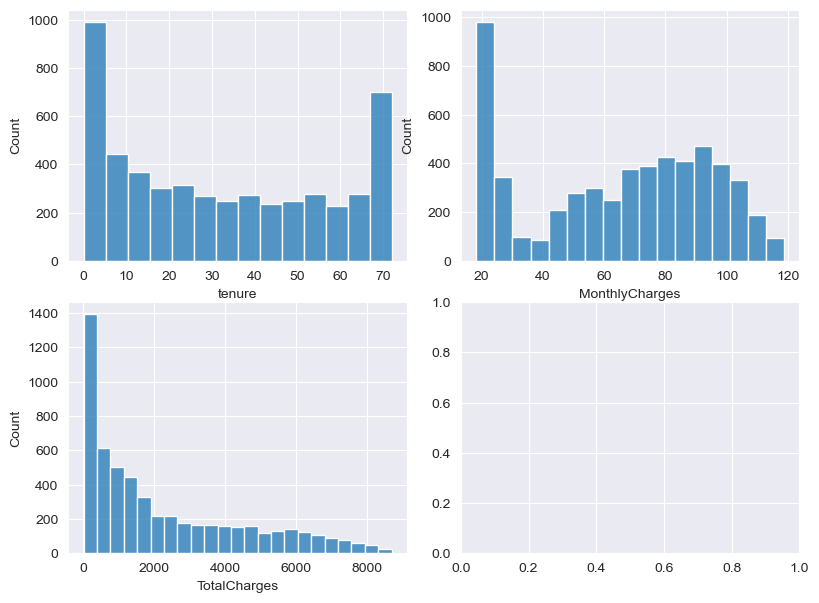

In [19]:
fig, graf = plt.subplots(2,2, figsize=(8,6))
plt.tight_layout()
for i,col in enumerate(["tenure","MonthlyCharges","TotalCharges"]):
    sns.histplot(data=df, x=col, ax=graf[i//2][i%2])

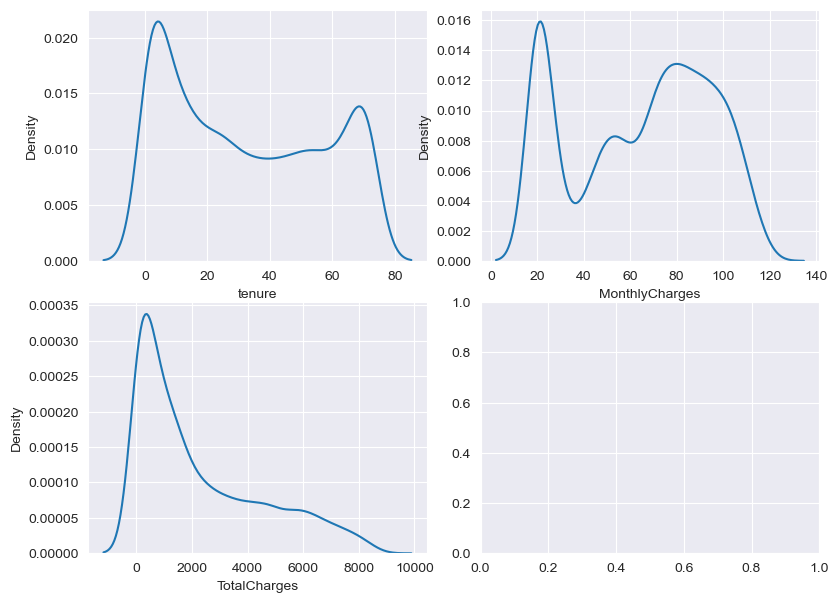

In [20]:
fig, graf = plt.subplots(2,2, figsize=(8,6))
plt.tight_layout()
for i,col in enumerate(["tenure","MonthlyCharges","TotalCharges"]):
    sns.kdeplot(data=df, x=col, ax=graf[i//2][i%2])

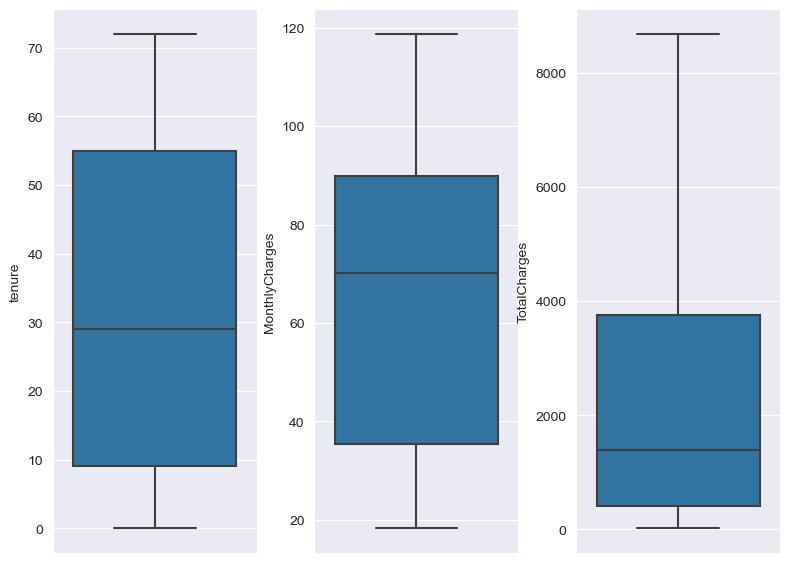

In [21]:
fig, graf = plt.subplots(1,3, figsize=(8,6))
plt.tight_layout()
for i,col in enumerate(["tenure","MonthlyCharges","TotalCharges"]):
    sns.boxplot(data=df, y=col, ax=graf[i])

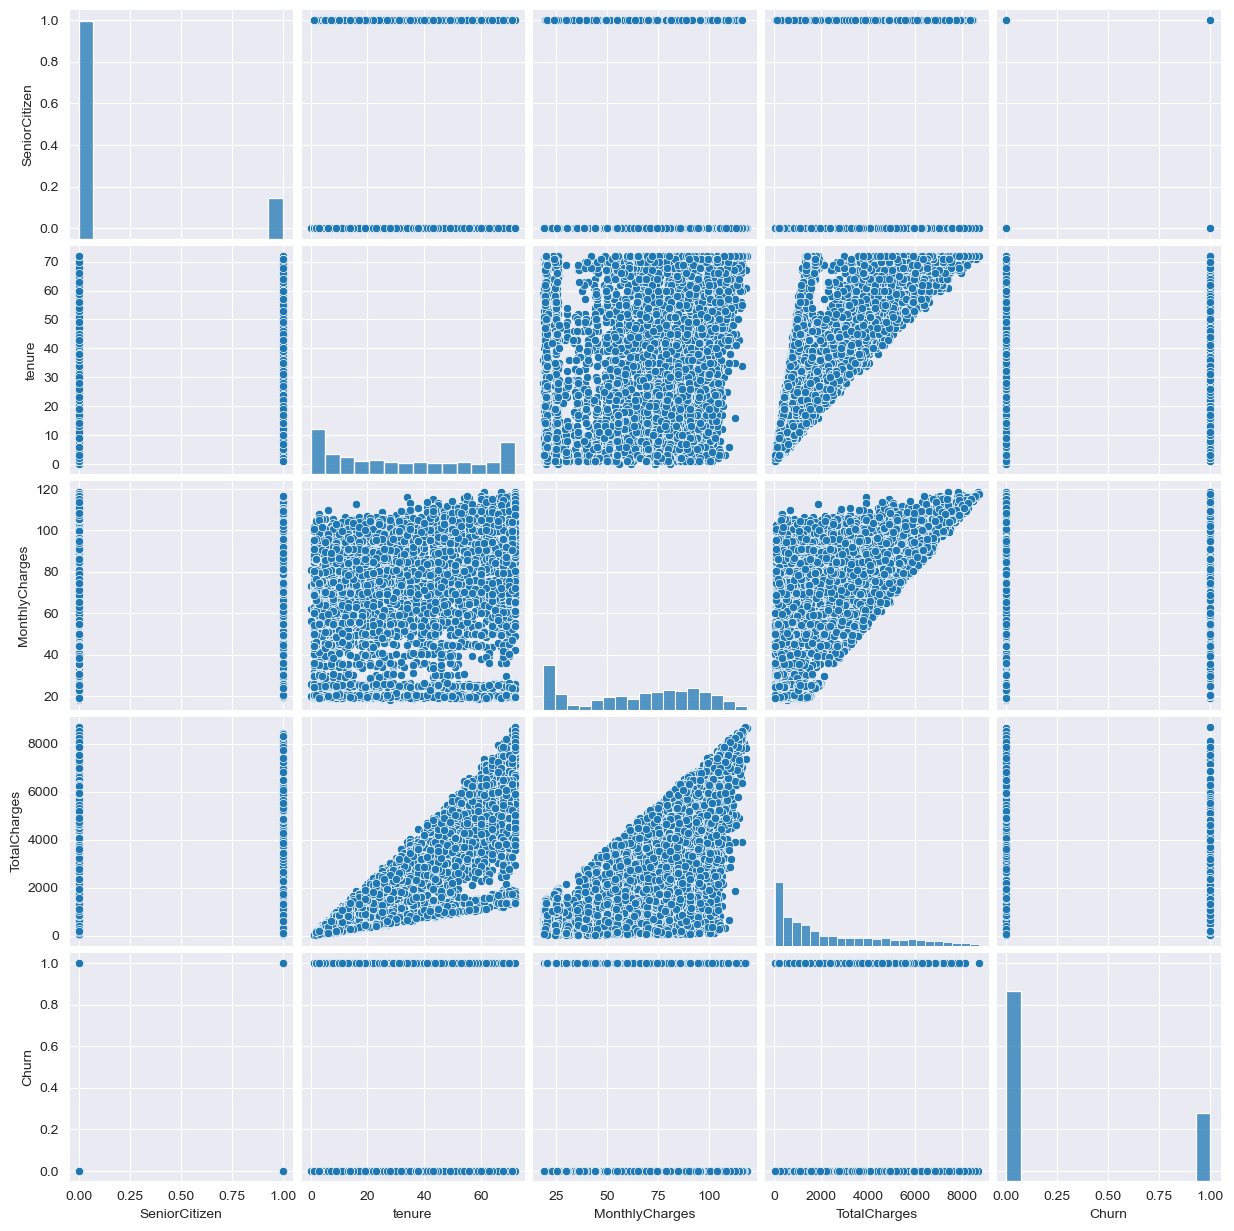

In [22]:
sns.pairplot(df)

### Coding of Categorical Variables

In [23]:
df["Dependents"].unique()

array(['No', 'Yes', nan], dtype=object)

In [24]:
def getCategoricalCols():
    return [col for col in df.columns if df[col].dtype=="O"]

getCategoricalCols()

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [25]:
def displayCategoricalCols():
    for col in getCategoricalCols():
        print(col,df[col].unique())

displayCategoricalCols()

gender ['Female' 'Male']
Partner ['No' 'Yes']
Dependents ['No' 'Yes' nan]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'No' 'Fiber optic']
OnlineSecurity ['Yes' 'No internet service' 'No']
OnlineBackup ['Yes' 'No internet service' 'No']
DeviceProtection ['Yes' 'No internet service' 'No']
TechSupport ['Yes' 'No internet service' 'No']
StreamingTV ['No' 'No internet service' 'Yes']
StreamingMovies ['No' 'No internet service' 'Yes']
Contract ['Two year' 'One year' 'Month-to-month']
PaperlessBilling ['No' 'Yes']
PaymentMethod [nan 'Mailed check' 'Credit card (automatic)' 'Bank transfer (automatic)'
 'Electronic check']


In [26]:
cols = [col for col in getCategoricalCols() if len(df[col].unique())==2]
cols

['gender', 'Partner', 'PhoneService', 'PaperlessBilling']

In [27]:
ohe = OneHotEncoder(drop="first")
ohe.fit(df[cols])
display(ohe.get_feature_names_out())
display(ohe.categories_)
display(ohe.transform(df[cols]).toarray())

array(['gender_Male', 'Partner_Yes', 'PhoneService_Yes',
       'PaperlessBilling_Yes'], dtype=object)

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

array([[0., 0., 0., 0.],
       [1., 1., 1., 0.],
       [0., 1., 1., 1.],
       ...,
       [0., 0., 1., 0.],
       [1., 1., 1., 0.],
       [1., 0., 1., 0.]])

In [28]:
pd.DataFrame(ohe.transform(df[cols]).toarray(), columns=ohe.get_feature_names_out(), index=df.index, dtype=int).head()

,gender_Male,Partner_Yes,PhoneService_Yes,PaperlessBilling_Yes
id,,,,
4030,0,0,0,0
6731,1,1,1,0
6479,0,1,1,1
6861,0,0,1,1
3266,1,1,1,1


In [29]:
df = pd.concat([df.drop(cols,axis=1), pd.DataFrame(ohe.transform(df[cols]).toarray(), columns=ohe.get_feature_names_out(), index=df.index, dtype=int)], axis=1)
df.head()

,SeniorCitizen,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,PhoneService_Yes,PaperlessBilling_Yes
id,,,,,,,,,,,,,,,,,,,,
4030,0,No,56.0,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,NaN,45.05,2560.10,0,0,0,0,0
6731,0,Yes,NaN,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Mailed check,19.65,332.65,0,1,1,1,0
6479,0,No,60.0,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Credit card (automatic),110.80,6640.70,0,0,1,1,1
6861,0,No,37.0,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Bank transfer (automatic),101.90,3545.35,1,0,0,1,1
3266,0,Yes,29.0,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.75,1974.80,1,1,1,1,1


In [30]:
displayCategoricalCols()

Dependents ['No' 'Yes' nan]
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'No' 'Fiber optic']
OnlineSecurity ['Yes' 'No internet service' 'No']
OnlineBackup ['Yes' 'No internet service' 'No']
DeviceProtection ['Yes' 'No internet service' 'No']
TechSupport ['Yes' 'No internet service' 'No']
StreamingTV ['No' 'No internet service' 'Yes']
StreamingMovies ['No' 'No internet service' 'Yes']
Contract ['Two year' 'One year' 'Month-to-month']
PaymentMethod [nan 'Mailed check' 'Credit card (automatic)' 'Bank transfer (automatic)'
 'Electronic check']


In [31]:
df["Dependents_Yes"] = df["Dependents"].map({"Yes":1, "No":0})
df = df.drop(["Dependents"],axis=1)
df.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,PhoneService_Yes,PaperlessBilling_Yes,Dependents_Yes
id,,,,,,,,,,,,,,,,,,,,
4030,0,56.0,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,NaN,45.05,2560.10,0,0,0,0,0,0.0
6731,0,NaN,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Mailed check,19.65,332.65,0,1,1,1,0,1.0
6479,0,60.0,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Credit card (automatic),110.80,6640.70,0,0,1,1,1,0.0
6861,0,37.0,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Bank transfer (automatic),101.90,3545.35,1,0,0,1,1,0.0
3266,0,29.0,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.75,1974.80,1,1,1,1,1,1.0


In [32]:
displayCategoricalCols()

MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'No' 'Fiber optic']
OnlineSecurity ['Yes' 'No internet service' 'No']
OnlineBackup ['Yes' 'No internet service' 'No']
DeviceProtection ['Yes' 'No internet service' 'No']
TechSupport ['Yes' 'No internet service' 'No']
StreamingTV ['No' 'No internet service' 'Yes']
StreamingMovies ['No' 'No internet service' 'Yes']
Contract ['Two year' 'One year' 'Month-to-month']
PaymentMethod [nan 'Mailed check' 'Credit card (automatic)' 'Bank transfer (automatic)'
 'Electronic check']


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 4030 to 103
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SeniorCitizen         5634 non-null   int64  
 1   tenure                5173 non-null   float64
 2   MultipleLines         5634 non-null   object 
 3   InternetService       5634 non-null   object 
 4   OnlineSecurity        5634 non-null   object 
 5   OnlineBackup          5634 non-null   object 
 6   DeviceProtection      5634 non-null   object 
 7   TechSupport           5634 non-null   object 
 8   StreamingTV           5634 non-null   object 
 9   StreamingMovies       5634 non-null   object 
 10  Contract              5634 non-null   object 
 11  PaymentMethod         5535 non-null   object 
 12  MonthlyCharges        5634 non-null   float64
 13  TotalCharges          5626 non-null   float64
 14  Churn                 5634 non-null   int64  
 15  gender_Male           56

In [34]:
cols=["MultipleLines", "Contract","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection", "TechSupport","StreamingTV","StreamingMovies"]
categories = [['No phone service','No','Yes'],
              ['Month-to-month', 'One year', 'Two year'],
              ['No','DSL', 'Fiber optic'],
              ['No internet service', 'No','Yes'], 
              ['No internet service', 'No','Yes'],
              ['No internet service', 'No','Yes'],
              ['No internet service', 'No','Yes'], 
              ['No internet service', 'No','Yes'], 
              ['No internet service', 'No','Yes']]
oe = OrdinalEncoder(dtype=int, categories=categories)
oe.fit(df[cols])
display(oe.categories_)
display(oe.transform(df[cols]))

[array(['No phone service', 'No', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'DSL', 'Fiber optic'], dtype=object),
 array(['No internet service', 'No', 'Yes'], dtype=object),
 array(['No internet service', 'No', 'Yes'], dtype=object),
 array(['No internet service', 'No', 'Yes'], dtype=object),
 array(['No internet service', 'No', 'Yes'], dtype=object),
 array(['No internet service', 'No', 'Yes'], dtype=object),
 array(['No internet service', 'No', 'Yes'], dtype=object)]

array([[0, 2, 1, ..., 2, 1, 1],
       [1, 1, 0, ..., 0, 0, 0],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [1, 0, 1, ..., 2, 1, 1],
       [2, 2, 0, ..., 0, 0, 0],
       [2, 1, 2, ..., 2, 2, 1]])

In [35]:
df[cols] = oe.transform(df[cols])
df["PaymentMethod"] = df["PaymentMethod"].map({'Mailed check':0, 
                                               'Electronic check':1, 
                                               'Bank transfer (automatic)':2, 
                                               'Credit card (automatic)':3})
df.head(10)                              

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,PhoneService_Yes,PaperlessBilling_Yes,Dependents_Yes
id,,,,,,,,,,,,,,,,,,,,
4030,0,56.0,0,1,2,2,2,2,1,1,2,NaN,45.05,2560.10,0,0,0,0,0,0.0
6731,0,NaN,1,0,0,0,0,0,0,0,1,0.0,19.65,332.65,0,1,1,1,0,1.0
6479,0,60.0,2,2,1,2,2,2,2,2,2,3.0,110.80,6640.70,0,0,1,1,1,0.0
6861,0,37.0,2,2,1,2,2,1,2,2,0,2.0,101.90,3545.35,1,0,0,1,1,0.0
3266,0,29.0,1,2,1,1,1,1,1,1,0,1.0,70.75,1974.80,1,1,1,1,1,1.0
6368,0,70.0,0,1,2,1,2,2,1,2,2,2.0,48.40,3442.80,0,1,0,0,0,0.0
5830,0,31.0,0,1,2,1,2,2,2,2,1,1.0,59.95,1848.80,0,1,1,0,0,1.0
4476,0,3.0,1,0,0,0,0,0,0,0,0,1.0,19.55,61.05,0,0,0,1,0,0.0
1508,0,54.0,1,0,0,0,0,0,0,0,2,3.0,19.65,1008.70,0,1,0,1,0,0.0


In [36]:
df.dtypes

SeniorCitizen             int64
tenure                  float64
MultipleLines             int32
InternetService           int32
OnlineSecurity            int32
OnlineBackup              int32
DeviceProtection          int32
TechSupport               int32
StreamingTV               int32
StreamingMovies           int32
Contract                  int32
PaymentMethod           float64
MonthlyCharges          float64
TotalCharges            float64
Churn                     int64
gender_Male               int32
Partner_Yes               int32
PhoneService_Yes          int32
PaperlessBilling_Yes      int32
Dependents_Yes          float64
dtype: object

In [37]:
displayCategoricalCols()

In [38]:
df.dtypes

SeniorCitizen             int64
tenure                  float64
MultipleLines             int32
InternetService           int32
OnlineSecurity            int32
OnlineBackup              int32
DeviceProtection          int32
TechSupport               int32
StreamingTV               int32
StreamingMovies           int32
Contract                  int32
PaymentMethod           float64
MonthlyCharges          float64
TotalCharges            float64
Churn                     int64
gender_Male               int32
Partner_Yes               int32
PhoneService_Yes          int32
PaperlessBilling_Yes      int32
Dependents_Yes          float64
dtype: object

In [39]:
df.isnull().sum()

SeniorCitizen             0
tenure                  461
MultipleLines             0
InternetService           0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport               0
StreamingTV               0
StreamingMovies           0
Contract                  0
PaymentMethod            99
MonthlyCharges            0
TotalCharges              8
Churn                     0
gender_Male               0
Partner_Yes               0
PhoneService_Yes          0
PaperlessBilling_Yes      0
Dependents_Yes          218
dtype: int64

### Variables Separation

In [40]:
X = df.drop(["Churn"], axis=1)
y = df[["Churn"]]
X.shape, y.shape

((5634, 19), (5634, 1))

### Base separation

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2, stratify=y)

X_train.to_csv("X_train_original.csv")
X_test.to_csv("X_test_original.csv")

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4507, 19), (1127, 19), (4507, 1), (1127, 1))

In [42]:
def load_originals():
    return pd.read_csv("X_train_original.csv", index_col="id"), pd.read_csv("X_test_original.csv", index_col="id")

X_train,X_test = load_originals()

### Missing Data

In [43]:
X_train.isnull().sum()

SeniorCitizen             0
tenure                  362
MultipleLines             0
InternetService           0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport               0
StreamingTV               0
StreamingMovies           0
Contract                  0
PaymentMethod            77
MonthlyCharges            0
TotalCharges              5
gender_Male               0
Partner_Yes               0
PhoneService_Yes          0
PaperlessBilling_Yes      0
Dependents_Yes          173
dtype: int64

In [44]:
X_test.isnull().sum()

SeniorCitizen            0
tenure                  99
MultipleLines            0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
Contract                 0
PaymentMethod           22
MonthlyCharges           0
TotalCharges             3
gender_Male              0
Partner_Yes              0
PhoneService_Yes         0
PaperlessBilling_Yes     0
Dependents_Yes          45
dtype: int64

In [45]:
[X_train.isnull().sum().index[i] for i,col in enumerate(X_train.isnull().sum().index) if X_train.isnull().sum()[i]>0]

['tenure', 'PaymentMethod', 'TotalCharges', 'Dependents_Yes']

In [46]:
[X_test.isnull().sum().index[i] for i,col in enumerate(X_test.isnull().sum().index) if X_test.isnull().sum()[i]>0]

['tenure', 'PaymentMethod', 'TotalCharges', 'Dependents_Yes']

In [47]:
X_train.loc[X_train["TotalCharges"].isnull(),["tenure","MonthlyCharges","TotalCharges"]]

,tenure,MonthlyCharges,TotalCharges
id,,,
1341,0.0,56.05,NaN
6671,0.0,73.35,NaN
1083,0.0,25.75,NaN
5219,0.0,19.70,NaN
937,0.0,80.85,NaN


In [48]:
X_train.loc[X_train["TotalCharges"].isnull(),"TotalCharges"]=0

In [49]:
X_test.loc[X_test["TotalCharges"].isnull(),["tenure","MonthlyCharges","TotalCharges"]]

,tenure,MonthlyCharges,TotalCharges
id,,,
6755,0.0,61.90,NaN
3332,0.0,19.85,NaN
3827,0.0,25.35,NaN


In [50]:
X_test.loc[X_test["TotalCharges"].isnull(),"TotalCharges"]=0

In [51]:
X_train.loc[X_train["tenure"].isnull(),["tenure","MonthlyCharges","TotalCharges"]].head(20)

,tenure,MonthlyCharges,TotalCharges
id,,,
340,NaN,103.40,6603.00
5154,NaN,94.55,3851.45
1531,NaN,90.00,190.05
4978,NaN,20.80,469.65
46,NaN,84.50,3906.70
333,NaN,94.90,4422.95
1049,NaN,19.80,572.20
5436,NaN,90.95,4236.60
4237,NaN,19.95,19.95


In [52]:
X_train.loc[X_train["tenure"].isnull(),"tenure"] = X_train.loc[X_train["tenure"].isnull(),"TotalCharges"] / X_train.loc[X_train["tenure"].isnull(),"MonthlyCharges"]
X_test.loc[X_test["tenure"].isnull(),"tenure"] = X_test.loc[X_test["tenure"].isnull(),"TotalCharges"] / X_test.loc[X_test["tenure"].isnull(),"MonthlyCharges"]

In [53]:
median_Dependents_Yes = X_train["Dependents_Yes"].median()
mode_PaymentMethod = X_train["PaymentMethod"].value_counts().index[0]

median_Dependents_Yes, mode_PaymentMethod

(0.0, 1.0)

In [54]:
X_train.loc[X_train["Dependents_Yes"].isnull(),"Dependents_Yes"] = median_Dependents_Yes
X_train.loc[X_train["PaymentMethod"].isnull(),"PaymentMethod"] = mode_PaymentMethod

X_test.loc[X_test["Dependents_Yes"].isnull(),"Dependents_Yes"] = median_Dependents_Yes
X_test.loc[X_test["PaymentMethod"].isnull(),"PaymentMethod"] = mode_PaymentMethod

In [55]:
X_train.isnull().sum()

SeniorCitizen           0
tenure                  0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
gender_Male             0
Partner_Yes             0
PhoneService_Yes        0
PaperlessBilling_Yes    0
Dependents_Yes          0
dtype: int64

In [56]:
X_test.isnull().sum()

SeniorCitizen           0
tenure                  0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
gender_Male             0
Partner_Yes             0
PhoneService_Yes        0
PaperlessBilling_Yes    0
Dependents_Yes          0
dtype: int64

### Machine Learning with Cross Validation

In [57]:
kfold = StratifiedKFold(shuffle=True, n_splits=10, random_state=42)
scoring = 'f1'

def tomeklinks(X_, y_):
    tl = TomekLinks(sampling_strategy='majority')
    X_under, y_under = tl.fit_resample(X_,y_)
    return X_under, y_under    

def smote(X_, y_):
    smote = SMOTE(sampling_strategy='minority', random_state=42)
    X_over, y_over = smote.fit_resample(X_,y_)
    return X_over, y_over

def getBestModelClassifier(X_, y_, sampling_technique=None):
    allowed_techniques = ['oversampling', 'undersampling', None]

    if sampling_technique not in allowed_techniques:
        raise ValueError(f"Invalid value for 'sampling_technique'. Choose from {allowed_techniques}.")

    scalers = [
        ("NoScaler", None),
        ("MinMaxScaler", MinMaxScaler()),
        ("StandardScaler", StandardScaler()),
        ("Normalizer", Normalizer()),
        ("RobustScaler", RobustScaler())
    ]

    models = [
        ("LogisticRegression", LogisticRegression(random_state=42)),
        ("PassiveAggressiveClassifier", PassiveAggressiveClassifier(random_state=42)),
        ("SGDClassifier", SGDClassifier(random_state=42)),
        ("RidgeClassifier", RidgeClassifier(random_state=42)),
        ("SVC", SVC(random_state=42)),
        ("KNeighborsClassifier", KNeighborsClassifier()),
        ("LinearDiscriminantAnalysis", LinearDiscriminantAnalysis()),
        ("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)),
        ("ExtraTreeClassifier", ExtraTreeClassifier(random_state=42)),
        ("GaussianNB", GaussianNB()),                
        #("GaussianProcessClassifier", GaussianProcessClassifier(random_state=42)),
        ("MLPClassifier", MLPClassifier(random_state=42))
    ]

    X_sampling_strategy = X_.copy()
    y_sampling_strategy = y_.copy()
    if sampling_technique == 'oversampling':
        X_sampling_strategy, y_sampling_strategy = smote(X_,y_)
    elif sampling_technique == 'undersampling':
        X_sampling_strategy, y_sampling_strategy = tomeklinks(X_,y_)

    results = {}
    for name_scaler, scaler in scalers:
        for name_model, model in models:
            print (name_scaler, name_model)
            
            pipeline = []
            if name_scaler != "NoScaler":
                pipeline.append((name_scaler, scaler))
            pipeline.append((name_model, model))
            estimator = Pipeline(pipeline)
            result = cross_val_score(estimator=estimator, X=X_sampling_strategy, y=y_sampling_strategy.values.flatten(), cv=kfold, scoring=scoring)
            results[name_scaler, name_model] = result
            clear_output(wait=True)

    df_results = pd.DataFrame(results)
    for col in df_results.columns:
        if df_results[col].mean() == df_results.mean().max():
            print(f"Best: {col} with mean {df_results[col].mean()} (std={df_results[col].std()})")
    display(df_results.mean())

def getBestModelEnsembleClassifier(X_, y_, sampling_technique=None):
    allowed_techniques = ['oversampling', 'undersampling', None]

    if sampling_technique not in allowed_techniques:
        raise ValueError(f"Invalid value for 'sampling_technique'. Choose from {allowed_techniques}.")

    scalers = [
        ("NoScaler", None),
        ("MinMaxScaler", MinMaxScaler()),
        ("StandardScaler", StandardScaler()),
        ("Normalizer", Normalizer()),
        ("RobustScaler", RobustScaler())
    ]

    models = [
        ("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)),
        ("ExtraTreeClassifier", ExtraTreeClassifier(random_state=42)),
        ("RandomForestClassifier", RandomForestClassifier(random_state=42)),
        ("GradientBoostingClassifier", GradientBoostingClassifier(random_state=42)),
        ("AdaBoostClassifier", AdaBoostClassifier(random_state=42)),
        ("ExtraTreesClassifier", ExtraTreesClassifier(random_state=42)),
        ("BaggingClassifier", BaggingClassifier(random_state=42)),
        ("XGBClassifier", XGBClassifier(random_state=42))        
    ]

    X_sampling_strategy = X_.copy()
    y_sampling_strategy = y_.copy()
    if sampling_technique == 'oversampling':
        X_sampling_strategy, y_sampling_strategy = smote(X_,y_)
    elif sampling_technique == 'undersampling':
        X_sampling_strategy, y_sampling_strategy = tomeklinks(X_,y_)

    results = {}
    for name_scaler, scaler in scalers:
        for name_model, model in models:
            print (name_scaler, name_model)
            
            pipeline = []
            if scaler is not None:
                pipeline.append((name_scaler, scaler))
            pipeline.append((name_model, model))
            estimator = Pipeline(pipeline)
            result = cross_val_score(estimator=estimator, X=X_sampling_strategy, y=y_sampling_strategy.values.flatten(), cv=kfold, scoring=scoring)
            results[name_scaler, name_model] = result
            clear_output(wait=True)

    df_results = pd.DataFrame(results)
    for col in df_results.columns:
        if df_results[col].mean() == df_results.mean().max():
            print(f"Best: {col} with mean {df_results[col].mean()} (std={df_results[col].std()})")
    display(df_results.mean())

In [58]:
getBestModelClassifier(X_train, y_train)

Best: ('MinMaxScaler', 'GaussianNB') with mean 0.6160004340654357 (std=0.027350044138260192)
Best: ('StandardScaler', 'GaussianNB') with mean 0.6160004340654357 (std=0.027350044138260192)
Best: ('RobustScaler', 'GaussianNB') with mean 0.6160004340654357 (std=0.027350044138260192)


NoScaler        LogisticRegression             0.606107
                PassiveAggressiveClassifier    0.422227
                SGDClassifier                  0.477792
                RidgeClassifier                0.577360
                SVC                            0.000000
                KNeighborsClassifier           0.507989
                LinearDiscriminantAnalysis     0.589984
                DecisionTreeClassifier         0.494322
                ExtraTreeClassifier            0.490639
                GaussianNB                     0.614952
                MLPClassifier                  0.566338
MinMaxScaler    LogisticRegression             0.603306
                PassiveAggressiveClassifier    0.413324
                SGDClassifier                  0.564261
                RidgeClassifier                0.577975
                SVC                            0.579746
                KNeighborsClassifier           0.550726
                LinearDiscriminantAnalysis     0

In [59]:
getBestModelClassifier(X_train, y_train, sampling_technique='undersampling' )

Best: ('StandardScaler', 'LogisticRegression') with mean 0.660889023468593 (std=0.02934841092839437)


NoScaler        LogisticRegression             0.657173
                PassiveAggressiveClassifier    0.396346
                SGDClassifier                  0.552197
                RidgeClassifier                0.634718
                SVC                            0.000000
                KNeighborsClassifier           0.592273
                LinearDiscriminantAnalysis     0.646578
                DecisionTreeClassifier         0.568491
                ExtraTreeClassifier            0.552884
                GaussianNB                     0.659323
                MLPClassifier                  0.615507
MinMaxScaler    LogisticRegression             0.653660
                PassiveAggressiveClassifier    0.622791
                SGDClassifier                  0.626925
                RidgeClassifier                0.635442
                SVC                            0.635038
                KNeighborsClassifier           0.608149
                LinearDiscriminantAnalysis     0

In [60]:
getBestModelClassifier(X_train, y_train, sampling_technique="oversampling")

Best: ('MinMaxScaler', 'MLPClassifier') with mean 0.8441320692701624 (std=0.013781811964214102)


NoScaler        LogisticRegression             0.809156
                PassiveAggressiveClassifier    0.644345
                SGDClassifier                  0.654035
                RidgeClassifier                0.805274
                SVC                            0.623942
                KNeighborsClassifier           0.800808
                LinearDiscriminantAnalysis     0.805277
                DecisionTreeClassifier         0.799889
                ExtraTreeClassifier            0.786087
                GaussianNB                     0.792788
                MLPClassifier                  0.771631
MinMaxScaler    LogisticRegression             0.815384
                PassiveAggressiveClassifier    0.750906
                SGDClassifier                  0.811457
                RidgeClassifier                0.805789
                SVC                            0.826137
                KNeighborsClassifier           0.808728
                LinearDiscriminantAnalysis     0

In [61]:
getBestModelEnsembleClassifier(X_train, y_train)

Best: ('NoScaler', 'AdaBoostClassifier') with mean 0.608986508527238 (std=0.04021076411617269)
Best: ('MinMaxScaler', 'AdaBoostClassifier') with mean 0.608986508527238 (std=0.04021076411617269)
Best: ('StandardScaler', 'AdaBoostClassifier') with mean 0.608986508527238 (std=0.04021076411617269)
Best: ('RobustScaler', 'AdaBoostClassifier') with mean 0.608986508527238 (std=0.04021076411617269)


NoScaler        DecisionTreeClassifier        0.494322
                ExtraTreeClassifier           0.490639
                RandomForestClassifier        0.568397
                GradientBoostingClassifier    0.591287
                AdaBoostClassifier            0.608987
                ExtraTreesClassifier          0.546057
                BaggingClassifier             0.529694
                XGBClassifier                 0.563640
MinMaxScaler    DecisionTreeClassifier        0.495385
                ExtraTreeClassifier           0.490639
                RandomForestClassifier        0.567571
                GradientBoostingClassifier    0.591031
                AdaBoostClassifier            0.608987
                ExtraTreesClassifier          0.545330
                BaggingClassifier             0.529254
                XGBClassifier                 0.564311
StandardScaler  DecisionTreeClassifier        0.495604
                ExtraTreeClassifier           0.490639
          

In [62]:
getBestModelEnsembleClassifier(X_train, y_train, sampling_technique='undersampling')

Best: ('NoScaler', 'AdaBoostClassifier') with mean 0.6744853142125371 (std=0.03263564642258805)
Best: ('MinMaxScaler', 'AdaBoostClassifier') with mean 0.6744853142125371 (std=0.03263564642258805)
Best: ('StandardScaler', 'AdaBoostClassifier') with mean 0.6744853142125371 (std=0.03263564642258805)
Best: ('RobustScaler', 'AdaBoostClassifier') with mean 0.6744853142125371 (std=0.03263564642258805)


NoScaler        DecisionTreeClassifier        0.568491
                ExtraTreeClassifier           0.552884
                RandomForestClassifier        0.645120
                GradientBoostingClassifier    0.671567
                AdaBoostClassifier            0.674485
                ExtraTreesClassifier          0.625557
                BaggingClassifier             0.612261
                XGBClassifier                 0.637784
MinMaxScaler    DecisionTreeClassifier        0.567137
                ExtraTreeClassifier           0.552884
                RandomForestClassifier        0.639167
                GradientBoostingClassifier    0.671567
                AdaBoostClassifier            0.674485
                ExtraTreesClassifier          0.625557
                BaggingClassifier             0.613192
                XGBClassifier                 0.637784
StandardScaler  DecisionTreeClassifier        0.569371
                ExtraTreeClassifier           0.552884
          

In [63]:
getBestModelEnsembleClassifier(X_train, y_train, sampling_technique="oversampling")

Best: ('Normalizer', 'ExtraTreesClassifier') with mean 0.8643530657470405 (std=0.011593257593940224)


NoScaler        DecisionTreeClassifier        0.799889
                ExtraTreeClassifier           0.786087
                RandomForestClassifier        0.855659
                GradientBoostingClassifier    0.855986
                AdaBoostClassifier            0.844209
                ExtraTreesClassifier          0.838325
                BaggingClassifier             0.834147
                XGBClassifier                 0.851942
MinMaxScaler    DecisionTreeClassifier        0.799271
                ExtraTreeClassifier           0.786087
                RandomForestClassifier        0.856220
                GradientBoostingClassifier    0.855986
                AdaBoostClassifier            0.844209
                ExtraTreesClassifier          0.838746
                BaggingClassifier             0.834406
                XGBClassifier                 0.851814
StandardScaler  DecisionTreeClassifier        0.799524
                ExtraTreeClassifier           0.786560
          

### Machine Learning with Cross Validation and Features Engineer to improve previous model

In [64]:
X_train_original, X_test_original = load_originals()

X_train["Dependents_Yes"] = X_train_original["Dependents_Yes"]
X_test["Dependents_Yes"] = X_test_original["Dependents_Yes"]

del(X_train_original)
del(X_test_original)

In [65]:
X_train.isnull().sum()

SeniorCitizen             0
tenure                    0
MultipleLines             0
InternetService           0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport               0
StreamingTV               0
StreamingMovies           0
Contract                  0
PaymentMethod             0
MonthlyCharges            0
TotalCharges              0
gender_Male               0
Partner_Yes               0
PhoneService_Yes          0
PaperlessBilling_Yes      0
Dependents_Yes          173
dtype: int64

In [66]:
imputer = KNNImputer(n_neighbors=3)
imputer.fit_transform(X_train)
display(imputer.feature_names_in_)

array(['SeniorCitizen', 'tenure', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'Partner_Yes', 'PhoneService_Yes', 'PaperlessBilling_Yes',
       'Dependents_Yes'], dtype=object)

In [67]:
imputed = imputer.transform(X_train)
X_train["Dependents_Yes"]=pd.DataFrame(data=imputed, columns=X_train.columns, index=X_train.index)["Dependents_Yes"]
X_train.isnull().sum()

SeniorCitizen           0
tenure                  0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
gender_Male             0
Partner_Yes             0
PhoneService_Yes        0
PaperlessBilling_Yes    0
Dependents_Yes          0
dtype: int64

In [68]:
X_train["Dependents_Yes"].head(20)

id
6819    0.0
1558    0.0
909     1.0
340     0.0
4164    0.0
5316    0.0
6413    1.0
4226    0.0
5568    0.0
684     0.0
3940    1.0
6373    1.0
924     0.0
5154    0.0
1870    1.0
6389    0.0
3060    1.0
2697    0.0
2351    0.0
5706    0.0
Name: Dependents_Yes, dtype: float64

In [69]:
imputer.fit_transform(X_test)
display(imputer.feature_names_in_)
imputed = imputer.transform(X_test)
X_test["Dependents_Yes"]=pd.DataFrame(data=imputed, columns=X_test.columns, index=X_test.index)["Dependents_Yes"]
X_test.isnull().sum()

array(['SeniorCitizen', 'tenure', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'Partner_Yes', 'PhoneService_Yes', 'PaperlessBilling_Yes',
       'Dependents_Yes'], dtype=object)

SeniorCitizen           0
tenure                  0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
gender_Male             0
Partner_Yes             0
PhoneService_Yes        0
PaperlessBilling_Yes    0
Dependents_Yes          0
dtype: int64

In [70]:
getBestModelEnsembleClassifier(X_train, y_train)

Best: ('NoScaler', 'AdaBoostClassifier') with mean 0.6083085589588821 (std=0.03986260622666006)
Best: ('MinMaxScaler', 'AdaBoostClassifier') with mean 0.6083085589588821 (std=0.03986260622666006)
Best: ('StandardScaler', 'AdaBoostClassifier') with mean 0.6083085589588821 (std=0.03986260622666006)
Best: ('RobustScaler', 'AdaBoostClassifier') with mean 0.6083085589588821 (std=0.03986260622666006)


NoScaler        DecisionTreeClassifier        0.504857
                ExtraTreeClassifier           0.492353
                RandomForestClassifier        0.573447
                GradientBoostingClassifier    0.595624
                AdaBoostClassifier            0.608309
                ExtraTreesClassifier          0.551646
                BaggingClassifier             0.533910
                XGBClassifier                 0.574806
MinMaxScaler    DecisionTreeClassifier        0.503804
                ExtraTreeClassifier           0.492353
                RandomForestClassifier        0.572041
                GradientBoostingClassifier    0.595366
                AdaBoostClassifier            0.608309
                ExtraTreesClassifier          0.551821
                BaggingClassifier             0.538405
                XGBClassifier                 0.574142
StandardScaler  DecisionTreeClassifier        0.504578
                ExtraTreeClassifier           0.492353
          

In [72]:
getBestModelEnsembleClassifier(X_train, y_train, sampling_technique="oversampling")

Best: ('Normalizer', 'ExtraTreesClassifier') with mean 0.869120799855929 (std=0.013455058910979149)


NoScaler        DecisionTreeClassifier        0.793329
                ExtraTreeClassifier           0.792058
                RandomForestClassifier        0.852887
                GradientBoostingClassifier    0.855936
                AdaBoostClassifier            0.845109
                ExtraTreesClassifier          0.840276
                BaggingClassifier             0.833623
                XGBClassifier                 0.849512
MinMaxScaler    DecisionTreeClassifier        0.793971
                ExtraTreeClassifier           0.793472
                RandomForestClassifier        0.852624
                GradientBoostingClassifier    0.855936
                AdaBoostClassifier            0.845109
                ExtraTreesClassifier          0.841065
                BaggingClassifier             0.834147
                XGBClassifier                 0.849386
StandardScaler  DecisionTreeClassifier        0.792844
                ExtraTreeClassifier           0.792058
          

In [73]:
X_train.to_csv("X_train_best.csv")
X_test.to_csv("X_test_best.csv")

In [74]:
X_train["has_fidelity"] =X_train["Contract"].isin([1,2]).astype(int)

X_train['TotalServices'] = (X_train['InternetService']>=1).astype(int) + \
                           (X_train['OnlineSecurity']==2).astype(int) + \
                           (X_train['MultipleLines']==2).astype(int) + \
                           (X_train['OnlineBackup']==2).astype(int) + \
                           (X_train['DeviceProtection']==2).astype(int) + \
                           (X_train['TechSupport']==2).astype(int) + \
                           (X_train['StreamingTV']==2).astype(int) + \
                           (X_train['StreamingMovies']==2).astype(int) + \
                           (X_train['PhoneService_Yes']==1).astype(int)

X_train['TotalInternetServices'] = (X_train['InternetService']>=1).astype(int) + \
                           (X_train['OnlineSecurity']==2).astype(int) + \
                           (X_train['OnlineBackup']==2).astype(int) + \
                           (X_train['DeviceProtection']==2).astype(int) + \
                           (X_train['TechSupport']==2).astype(int) + \
                           (X_train['StreamingTV']==2).astype(int) + \
                           (X_train['StreamingMovies']==2).astype(int)

X_train['TotalPhoneServices'] = (X_train['PhoneService_Yes']==1).astype(int) + \
                                (X_train['MultipleLines']==2).astype(int)

X_train['TotalStreamingServices'] = (X_train['StreamingTV']==2).astype(int) + \
                                    (X_train['StreamingMovies']==2).astype(int)


In [75]:
X_test["has_fidelity"] =X_test["Contract"].isin([1,2]).astype(int)

X_test['TotalServices'] = (X_test['InternetService']>=1).astype(int) + \
                           (X_test['OnlineSecurity']==2).astype(int) + \
                           (X_test['MultipleLines']==2).astype(int) + \
                           (X_test['OnlineBackup']==2).astype(int) + \
                           (X_test['DeviceProtection']==2).astype(int) + \
                           (X_test['TechSupport']==2).astype(int) + \
                           (X_test['StreamingTV']==2).astype(int) + \
                           (X_test['StreamingMovies']==2).astype(int) + \
                           (X_test['PhoneService_Yes']==1).astype(int)

X_test['TotalInternetServices'] = (X_test['InternetService']>=1).astype(int) + \
                           (X_test['OnlineSecurity']==2).astype(int) + \
                           (X_test['OnlineBackup']==2).astype(int) + \
                           (X_test['DeviceProtection']==2).astype(int) + \
                           (X_test['TechSupport']==2).astype(int) + \
                           (X_test['StreamingTV']==2).astype(int) + \
                           (X_test['StreamingMovies']==2).astype(int)

X_test['TotalPhoneServices'] = (X_test['PhoneService_Yes']==1).astype(int) + \
                                (X_test['MultipleLines']==2).astype(int)

X_test['TotalStreamingServices'] = (X_test['StreamingTV']==2).astype(int) + \
                                    (X_test['StreamingMovies']==2).astype(int)

In [76]:
getBestModelClassifier(X_train, y_train)

Best: ('NoScaler', 'GaussianNB') with mean 0.6122425695779771 (std=0.024205313728416163)


NoScaler        LogisticRegression             0.611604
                PassiveAggressiveClassifier    0.441622
                SGDClassifier                  0.452744
                RidgeClassifier                0.582943
                SVC                            0.000000
                KNeighborsClassifier           0.507677
                LinearDiscriminantAnalysis     0.596910
                DecisionTreeClassifier         0.505291
                ExtraTreeClassifier            0.493076
                GaussianNB                     0.612243
                MLPClassifier                  0.554334
MinMaxScaler    LogisticRegression             0.602618
                PassiveAggressiveClassifier    0.401300
                SGDClassifier                  0.571762
                RidgeClassifier                0.583689
                SVC                            0.592326
                KNeighborsClassifier           0.553495
                LinearDiscriminantAnalysis     0

In [77]:
getBestModelEnsembleClassifier(X_train, y_train, sampling_technique="oversampling")

Best: ('Normalizer', 'ExtraTreesClassifier') with mean 0.8656912267561315 (std=0.012566403575381347)


NoScaler        DecisionTreeClassifier        0.796793
                ExtraTreeClassifier           0.791347
                RandomForestClassifier        0.852499
                GradientBoostingClassifier    0.854221
                AdaBoostClassifier            0.846095
                ExtraTreesClassifier          0.840043
                BaggingClassifier             0.835441
                XGBClassifier                 0.851304
MinMaxScaler    DecisionTreeClassifier        0.796173
                ExtraTreeClassifier           0.791347
                RandomForestClassifier        0.852301
                GradientBoostingClassifier    0.854221
                AdaBoostClassifier            0.846095
                ExtraTreesClassifier          0.841717
                BaggingClassifier             0.834571
                XGBClassifier                 0.851175
StandardScaler  DecisionTreeClassifier        0.796303
                ExtraTreeClassifier           0.791347
          

### Parameter Tuning

In [78]:
X_train = pd.read_csv("X_train_best.csv")
X_test = pd.read_csv("X_test_best.csv")

In [79]:
X_train_over, y_train_over = smote(X_train, y_train)

In [83]:
estimator = make_pipeline(Normalizer(),ExtraTreesClassifier(random_state=42))
param_grid = dict(extratreesclassifier__criterion=['gini', 'entropy', 'log_loss'],
                  extratreesclassifier__n_estimators=[150,200,250,300, 350])
grid = GridSearchCV(estimator=estimator, cv=kfold, param_grid=param_grid, scoring=scoring)
grid_result = grid.fit(X_train_over, y_train_over.values.flatten())              
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} (stdev) with: {param}")

Best: 0.8730092691062129 using {'extratreesclassifier__criterion': 'gini', 'extratreesclassifier__n_estimators': 300}
0.8715070987225626 (stdev) with: {'extratreesclassifier__criterion': 'gini', 'extratreesclassifier__n_estimators': 150}
0.8721424089940989 (stdev) with: {'extratreesclassifier__criterion': 'gini', 'extratreesclassifier__n_estimators': 200}
0.8714291182407189 (stdev) with: {'extratreesclassifier__criterion': 'gini', 'extratreesclassifier__n_estimators': 250}
0.8730092691062129 (stdev) with: {'extratreesclassifier__criterion': 'gini', 'extratreesclassifier__n_estimators': 300}
0.8729923590039903 (stdev) with: {'extratreesclassifier__criterion': 'gini', 'extratreesclassifier__n_estimators': 350}
0.8713317464715121 (stdev) with: {'extratreesclassifier__criterion': 'entropy', 'extratreesclassifier__n_estimators': 150}
0.8716156537053633 (stdev) with: {'extratreesclassifier__criterion': 'entropy', 'extratreesclassifier__n_estimators': 200}
0.871672418220296 (stdev) with: {'ex

## Champion Model Fit

In [84]:
scaler = Normalizer()
cols = X_train_over.columns
X_train_over_scaled = X_train_over.copy()
X_test_scaled = X_test.copy()

X_train_over_scaled[cols] = scaler.fit_transform(X_train_over)
X_test_scaled[cols] = scaler.transform(X_test)

In [85]:
model = ExtraTreesClassifier(random_state=42, n_estimators=300, criterion='gini')
model.fit(X_train_over_scaled, y_train_over)

ExtraTreesClassifier(n_estimators=300, random_state=42)

## Tests

In [86]:
pred = model.predict(X_test_scaled)
len(pred)

1127

In [87]:
pd.DataFrame(data={"real":y_test["Churn"], "pred":pred}).head(20)

,real,pred
id,,
6193,0,1
3450,0,0
6217,0,0
6666,0,0
3379,0,0
6647,0,0
6019,0,0
3647,0,0
1028,0,0


In [88]:
f1_score(y_true=y_test, y_pred=pred)

0.5694682675814751

In [89]:
df["Churn"].value_counts()

Churn
0    4139
1    1495
Name: count, dtype: int64

In [90]:
df["Churn"].value_counts(normalize=True)[0] * 100,  accuracy_score(y_true=y_test, y_pred=pred)*100

(73.46467873624422, 77.7284826974268)

In [91]:
cm = confusion_matrix(y_test,pred)
cm

array([[710, 118],
       [133, 166]], dtype=int64)

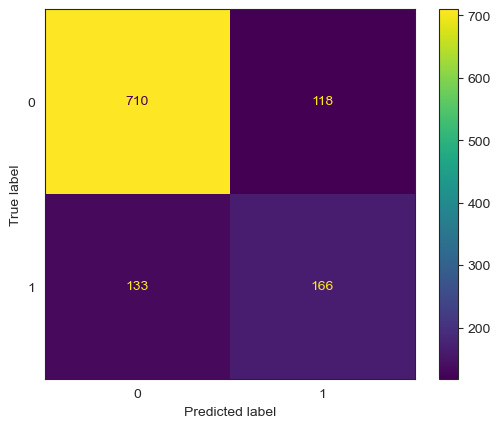

In [92]:
sns.set_style("white")
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [93]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       828
           1       0.58      0.56      0.57       299

    accuracy                           0.78      1127
   macro avg       0.71      0.71      0.71      1127
weighted avg       0.77      0.78      0.78      1127

